In [4]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import rolling_pandas as rp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import fix_yahoo_finance as yf

In [27]:
dt_beg = '2000-01-01'
dt_end = '2017-12-31'

aapl = yf.download('AAPL', dt_beg, dt_end)
msft = yf.download('MSFT', dt_beg, dt_end)
spy = yf.download('SPY', dt_beg, dt_end)
ief = yf.download('IEF', dt_beg, dt_end)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [7]:
aapl.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,3.745536,4.017857,3.631696,3.997768,2.677157,133949200
2000-01-04,3.866071,3.950893,3.613839,3.660714,2.451444,128094400
2000-01-05,3.705357,3.948661,3.678571,3.714286,2.487319,194580400
2000-01-06,3.790179,3.821429,3.392857,3.392857,2.272070,191993200
2000-01-07,3.446429,3.607143,3.410714,3.553571,2.379695,115183600
2000-01-10,3.642857,3.651786,3.383929,3.491071,2.337840,126266000
2000-01-11,3.426339,3.549107,3.232143,3.312500,2.218258,110387200
2000-01-12,3.392857,3.410714,3.089286,3.113839,2.085222,244017200
2000-01-13,3.374439,3.526786,3.303571,3.455357,2.313924,258171200


In [9]:
rp.sum(aapl, 2).head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,7.611607,7.968750,7.245535,7.658482,5.128601,262043600.0
2000-01-05,7.571428,7.899554,7.292410,7.375000,4.938763,322674800.0
2000-01-06,7.495536,7.770090,7.071428,7.107143,4.759389,386573600.0
2000-01-07,7.236608,7.428572,6.803571,6.946428,4.651765,307176800.0
2000-01-10,7.089286,7.258929,6.794643,7.044642,4.717535,241449600.0
2000-01-11,7.069196,7.200893,6.616072,6.803571,4.556098,236653200.0
2000-01-12,6.819196,6.959821,6.321429,6.426339,4.303480,354404400.0
2000-01-13,6.767296,6.937500,6.392857,6.569196,4.399146,502188400.0


In [10]:
rp.mean(aapl, 4).head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,3.776786,3.934710,3.579241,3.691406,2.471997,162154300.0
2000-01-07,3.702009,3.832032,3.523995,3.580357,2.397632,157462900.0
2000-01-10,3.646206,3.757255,3.466518,3.537946,2.369231,157005800.0
2000-01-11,3.576451,3.657366,3.354911,3.437500,2.301966,135957500.0
2000-01-12,3.477121,3.554688,3.279018,3.367745,2.255254,148963500.0
2000-01-13,3.459123,3.534598,3.252232,3.343192,2.238811,184710400.0


In [11]:
rp.prod(aapl, 4).head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,203.363768,239.533019,163.803428,184.426908,37.089332,6.409958e+32
2000-01-07,187.123762,215.047438,153.836292,163.935003,32.968294,5.511956e+32
2000-01-10,176.319862,198.767019,144.049331,156.338009,31.440488,5.433279e+32
2000-01-11,163.042757,178.654338,126.567636,139.426434,28.039473,3.082348e+32
2000-01-12,145.951091,159.453140,115.243179,127.960438,25.733594,3.917565e+32
2000-01-13,142.902422,155.900972,111.622969,124.423853,25.022358,8.780786e+32


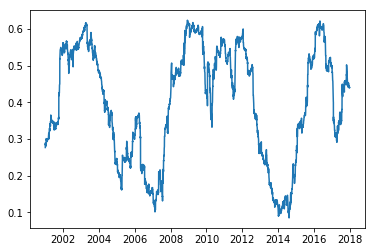

In [15]:
# Rolling correlation between Apple and Msft
plt.plot(rp.corr(rp.pct_change(aapl['Adj Close']), rp.pct_change(msft['Adj Close']), 252))

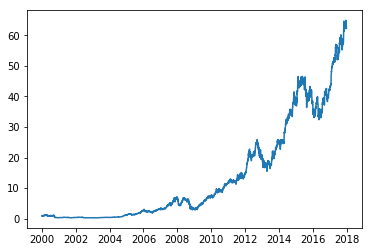

In [18]:
plt.plot(rp.cumprod(1+rp.pct_change(aapl['Adj Close'])))

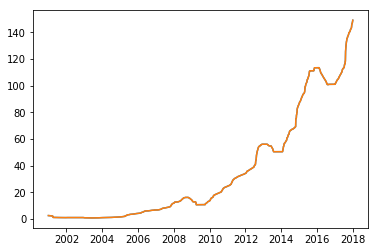

In [21]:
plt.plot(rp.median(aapl['Adj Close'], 252))
plt.plot(rp.quantile(aapl['Adj Close'], 0.5, 252))

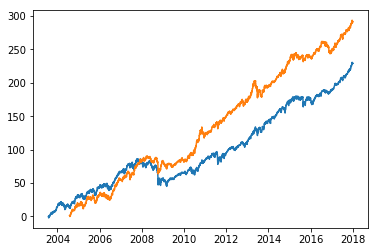

In [41]:
# 60/40 equity / bond
port_60_40 = 0.6*rp.pct_change(spy['Adj Close'])+0.4*rp.pct_change(ief['Adj Close'])
port_60_40_vol_scaled = port_60_40 / rp.shift(rp.std(port_60_40, 252))
plt.plot(rp.cumsum(port_60_40_vol_scaled))

# risk parity w 1y vol lookback (this is crude - vol scaling should apply instantaneously not based on rolling window)
risk_parity = \
    (rp.pct_change(spy['Adj Close']) / rp.std(rp.pct_change(spy['Adj Close']), 252)) \
    + (rp.pct_change(ief['Adj Close']) / rp.std(rp.pct_change(ief['Adj Close']), 252))
risk_parity_vol = rp.std(risk_parity, 252)
risk_parity_vol_scaled = risk_parity / rp.shift(risk_parity_vol)
plt.plot(rp.cumsum(risk_parity_vol_scaled))


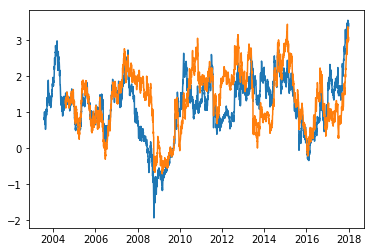

In [43]:
# compare sharpe ratios
port_60_40_sharpe = np.sqrt(252)*rp.mean(port_60_40, 252)/rp.std(port_60_40, 252)
risk_parity_sharpe = np.sqrt(252)*rp.mean(risk_parity, 252)/rp.std(risk_parity, 252)
plt.plot(port_60_40_sharpe)
plt.plot(risk_parity_sharpe)